In [41]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.weightstats import CompareMeans 

In [42]:
df = pd.read_csv("C:/Users/ouaga/Dropbox/PythonScripts/Stats_tests/Goats50.csv")

In [43]:
df.head(10)

,Method1,Method2
0,56.16,60.52
1,56.26,62.37
2,61.10,61.54
3,63.61,58.76
4,63.22,63.27
5,56.02,60.86
6,58.02,60.08
7,61.37,61.45
8,63.38,61.82
9,61.12,59.30


In [44]:
melted_df = pd.melt(df,var_name="Feed_type", value_name="Weights")

In [45]:
melted_df.head()

,Feed_type,Weights
0,Method1,56.16
1,Method1,56.26
2,Method1,61.10
3,Method1,63.61
4,Method1,63.22


### Look at descriptive summary of the data

In [46]:
bygroup = melted_df.groupby(['Feed_type'])['Weights']
bygroup.aggregate(['count',np.mean, np.std]).round(2)

,count,mean,std
Feed_type,,,
Method1,50,59.49,2.90
Method2,50,61.14,1.19


## First, we need to test the equality of variances with Levene test <br> which does not require a normality assumption like Barlett's test.

\begin{align}
  & {{H}_{0}}:\,\,\sigma _{1}^{2}\,=\,\,\sigma _{2}^{2} \\ 
 & {{H}_{1}}:\,\,\sigma _{1}^{2}\,\ne \,\,\sigma _{2}^{2} \\ 
\end{align}



> ### Useage: center:  default: center='median'
> 1. ‘median’ : Recommended for skewed (non-normal) distributions>
> 2. ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
> 3. ‘trimmed’ : Recommended for heavy-tailed distributions.

In [47]:
(test_statistic, p_value) = stats.levene(df['Method1'],df['Method2'],center='median')
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  22.76632
The p-value is:  1e-05


### Standard deviations of the pop are either assumed to be equal<br> usevar=pooled or unequal, usevar=unequal

$\begin{align}
  & {{H}_{0}}:\,{{\mu }_{1}}\,=\,{{\mu }_{2}} \\ 
 & {{H}_{1}}:\,{{\mu }_{1}}\,\ne \,{{\mu }_{2}} \\ 
\end{align}$

### Two tailed-test

In [49]:
(tstat, p_value)= CompareMeans.from_data(df['Method1'],df['Method2']).ztest_ind(alternative='two-sided',usevar='unequal',value=0)

In [50]:
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -3.72138
The p-value is:  0.0002


## Graphically check the variability using boxplots

In [ ]:
melted_df = pd.melt(df,var_name="Feed_type", value_name="Weights")

In [ ]:
melted_df.head()

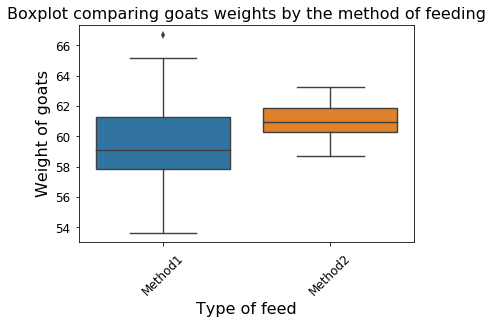

In [51]:
sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
plt.title('Boxplot comparing goats weights by the method of feeding')
sns.boxplot(x='Feed_type', y='Weights', data=melted_df)
plt.xlabel('Type of feed')
plt.ylabel('Weight of goats')
plt.xticks(rotation=45)
plt.show()

### Left-tailed-test

In [52]:
(tstat, p_value)= CompareMeans.from_data(df['Method1'],df['Method2']).ztest_ind(alternative='smaller',usevar='unequal',value=0)

In [53]:
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -3.72138
The p-value is:  0.0001


### Right-tailed-test

In [54]:
(tstat, p_value)= CompareMeans.from_data(df['Method1'],df['Method2']).ztest_ind(alternative='larger',usevar='unequal',value=0)

In [55]:
print("The test statistic is: ", round(tstat,5))
print("The p-value is: ", round(p_value,5))

The test statistic is:  -3.72138
The p-value is:  0.9999
